# 🚀 HOUSE PRICES: Predict ！

## 🍕 **一、数据的初步认识**

### 0️⃣. **导入相关包**

In [208]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from scipy.stats import skew
#显示中文
plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus'] = False

### 1️⃣. **导入数据集** 

In [209]:
# 导入数据集
data = pd.read_csv('data.csv')
data[:5]

,Direction,District,Elevator,Floor,Garden,Id,Layout,Price,Region,Renovation,Size,Year
0,东西,灯市口,NaN,6,锡拉胡同21号院,101102647043,3室1厅,780.0,东城,精装,75.0,1988
1,南北,东单,无电梯,6,东华门大街,101102650978,2室1厅,705.0,东城,精装,60.0,1988
2,南西,崇文门,有电梯,16,新世界中心,101102672743,3室1厅,1400.0,东城,其他,210.0,1996
3,南,崇文门,NaN,7,兴隆都市馨园,101102577410,1室1厅,420.0,东城,精装,39.0,2004
4,南,陶然亭,有电梯,19,中海紫御公馆,101102574696,2室2厅,998.0,东城,精装,90.0,2010


由于我们不需要ID列，故我们将其删除

In [210]:
data_id = data['Id']
data.drop(columns='Id',inplace=True)
data.head(5)

,Direction,District,Elevator,Floor,Garden,Layout,Price,Region,Renovation,Size,Year
0,东西,灯市口,NaN,6,锡拉胡同21号院,3室1厅,780.0,东城,精装,75.0,1988
1,南北,东单,无电梯,6,东华门大街,2室1厅,705.0,东城,精装,60.0,1988
2,南西,崇文门,有电梯,16,新世界中心,3室1厅,1400.0,东城,其他,210.0,1996
3,南,崇文门,NaN,7,兴隆都市馨园,1室1厅,420.0,东城,精装,39.0,2004
4,南,陶然亭,有电梯,19,中海紫御公馆,2室2厅,998.0,东城,精装,90.0,2010


wjq

查看数据的属性，将属性特征保存到excel中

In [211]:
cols = data.columns
col_type = data.dtypes
excel = pd.DataFrame({'特征':cols, '数据类型':col_type})
excel.to_excel('特征描述.xlsx', index=False)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23677 entries, 0 to 23676
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Direction   23677 non-null  object 
 1   District    23677 non-null  object 
 2   Elevator    15440 non-null  object 
 3   Floor       23677 non-null  int64  
 4   Garden      23677 non-null  object 
 5   Layout      23677 non-null  object 
 6   Price       23677 non-null  float64
 7   Region      23677 non-null  object 
 8   Renovation  23677 non-null  object 
 9   Size        23677 non-null  float64
 10  Year        23677 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 2.0+ MB


In [1]:
feature_xls = pd.read_table("特征描述.txt")
feature_xls

NameError: name 'pd' is not defined

### 2️⃣. **数据预处理**

- 处理`Region`和`Renovation`

In [213]:
# 地区（城区）
data = data.join(pd.get_dummies(data["Region"]))
# 装修风格
data = data.join(pd.get_dummies(data["Renovation"]))
data.drop(['Region','Renovation'], axis=1, inplace=True) 
data.to_csv("Region_Renovation_onehot.csv")
data.iloc[:5,9:]

,东城,丰台,亦庄开发区,大兴,密云,平谷,怀柔,房山,昌平,朝阳,...,石景山,西城,通州,门头沟,顺义,其他,南北,毛坯,简装,精装
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


- 处理`Direction` 东南西北 $[0,0,0,0]$一个4维向量

例如：某个四合院的朝向是:`东南北`，那么对应的向量为$[1,1,0,1]$|

| 朝向 | [东,南,西,北]|
| ------ | ------- |
| 东南北 | [1 , 1 , 0 , 1] |



In [214]:
for i in range(len(data["Direction"])):
    dire = ["东","南","西","北"]
    
    for j in dire:
        if j in data.at[i,"Direction"]:
            data.at[i,j] = 1
        else:
            data.at[i,j] = 0

data.drop(['Direction'], axis=1, inplace=True) 
            
data.to_csv("Direction_split.csv")
data.iloc[:5,29:]

,东,南,西,北
0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0
2,0.0,1.0,1.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0


- 处理`Layout`

例如：将3室1厅 转换成

<style> 
table {float:left} 
</style>
| 布局 | Room|Hall|
| ------ | ------- | ------- |
| 3室1厅 | 3 | 1 |  


    


In [ ]:
for i in range(len(data["Layout"])):
    str_layout = data.at[i,"Layout"]
    if "室" in str_layout:
        temp = str_layout.split("室")
        data.at[i,"Room"] = int(temp[0])
        if "厅" in str_layout:
            tmp = temp[1].split("厅")
            data.at[i,"Hall"] = int(tmp[0])
    elif "房间" in str_layout:
        temp = str_layout.split("房间")
        data.at[i,"Room"] = int(temp[0])
        if "厅" in str_layout:
            tmp = temp[1].split("厅")
            data.at[i,"Hall"] = int(tmp[0])

In [215]:
for i in range(len(data["Layout"])):
    str_layout = data.at[i,"Layout"]
    if "室" in str_layout:
        temp = str_layout.split("室")
        data.at[i,"Room"] = int(temp[0])
        if "厅" in str_layout:
            tmp = temp[1].split("厅")
            data.at[i,"Hall"] = int(tmp[0])
    elif "房间" in str_layout:
        temp = str_layout.split("房间")
        data.at[i,"Room"] = int(temp[0])
        if "厅" in str_layout:
            tmp = temp[1].split("厅")
            data.at[i,"Hall"] = int(tmp[0])

data.drop(['Layout'], axis=1, inplace=True) 

data.to_csv("Room_Hall_split.csv")
data.iloc[:3,32:]

,Room,Hall
0,3.0,1.0
1,2.0,1.0
2,3.0,1.0


预处理结束，查看数据情况

In [216]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23677 entries, 0 to 23676
Data columns (total 34 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   District  23677 non-null  object 
 1   Elevator  15440 non-null  object 
 2   Floor     23677 non-null  int64  
 3   Garden    23677 non-null  object 
 4   Price     23677 non-null  float64
 5   Size      23677 non-null  float64
 6   Year      23677 non-null  int64  
 7   东城        23677 non-null  uint8  
 8   丰台        23677 non-null  uint8  
 9   亦庄开发区     23677 non-null  uint8  
 10  大兴        23677 non-null  uint8  
 11  密云        23677 non-null  uint8  
 12  平谷        23677 non-null  uint8  
 13  怀柔        23677 non-null  uint8  
 14  房山        23677 non-null  uint8  
 15  昌平        23677 non-null  uint8  
 16  朝阳        23677 non-null  uint8  
 17  海淀        23677 non-null  uint8  
 18  石景山       23677 non-null  uint8  
 19  西城        23677 non-null  uint8  
 20  通州        23677 non-null  ui

### 3️⃣. **查看相关性**

In [217]:
# 查看相关性 本例使用的是pearson相关系数
data_corr = data.corr(method="pearson")
data_corr

,Floor,Price,Size,Year,东城,丰台,亦庄开发区,大兴,密云,平谷,...,南北,毛坯,简装,精装,东,南,西,北,Room,Hall
Floor,1.000000,0.110961,0.009549,0.362217,-0.023013,0.152112,0.005757,-0.058296,-0.016738,0.007925,...,-0.030869,-0.043672,-0.097026,0.134894,0.164964,-0.205322,0.193201,-0.320073,-0.147676,-0.091950
Price,0.110961,1.000000,0.680867,0.079594,0.153961,-0.078487,-0.021004,-0.114332,-0.010143,-0.030571,...,0.075038,0.032532,-0.131792,0.135815,0.049877,0.072479,0.043858,0.058662,0.477134,0.387468
Size,0.009549,0.680867,1.000000,0.282007,-0.056716,-0.059608,0.040893,0.014446,0.031696,0.012609,...,-0.053946,0.094773,-0.116059,0.117294,-0.044164,0.206657,-0.046753,0.216533,0.725585,0.611851
Year,0.362217,0.079594,0.282007,1.000000,-0.125087,-0.011289,0.079797,0.120110,0.022948,0.059427,...,0.035445,0.053262,-0.204798,0.215558,-0.059104,-0.010983,-0.032872,0.003416,0.069423,0.193501
东城,-0.023013,0.153961,-0.056716,-0.125087,1.000000,-0.099301,-0.037403,-0.082405,-0.005925,-0.010958,...,-0.007650,-0.021494,-0.006137,-0.020115,0.081230,-0.130890,0.078325,-0.084289,-0.070326,-0.072951
丰台,0.152112,-0.078487,-0.059608,-0.011289,-0.099301,1.000000,-0.053651,-0.118201,-0.008499,-0.015719,...,-0.006573,-0.028890,0.064931,-0.059494,0.056341,-0.055195,0.069096,-0.079140,-0.076016,-0.064511
亦庄开发区,0.005757,-0.021004,0.040893,0.079797,-0.037403,-0.053651,1.000000,-0.044522,-0.003201,-0.005921,...,-0.004133,0.003129,-0.022313,0.031718,-0.018602,-0.012797,-0.011909,0.010525,0.033482,0.035316
大兴,-0.058296,-0.114332,0.014446,0.120110,-0.082405,-0.118201,-0.044522,1.000000,-0.007053,-0.013044,...,0.006185,0.009177,0.031176,-0.060890,-0.057916,0.068538,-0.058292,0.088127,0.047371,0.044582
密云,-0.016738,-0.010143,0.031696,0.022948,-0.005925,-0.008499,-0.003201,-0.007053,1.000000,-0.000938,...,-0.000655,0.008624,-0.012935,-0.006573,-0.012142,0.007878,-0.007628,0.017518,0.027375,0.026077
平谷,0.007925,-0.030571,0.012609,0.059427,-0.010958,-0.015719,-0.005921,-0.013044,-0.000938,1.000000,...,-0.001211,0.039578,-0.026925,-0.009446,-0.017593,0.017987,-0.015123,0.026113,0.004914,0.031855


**转换为热力图**

<AxesSubplot:>

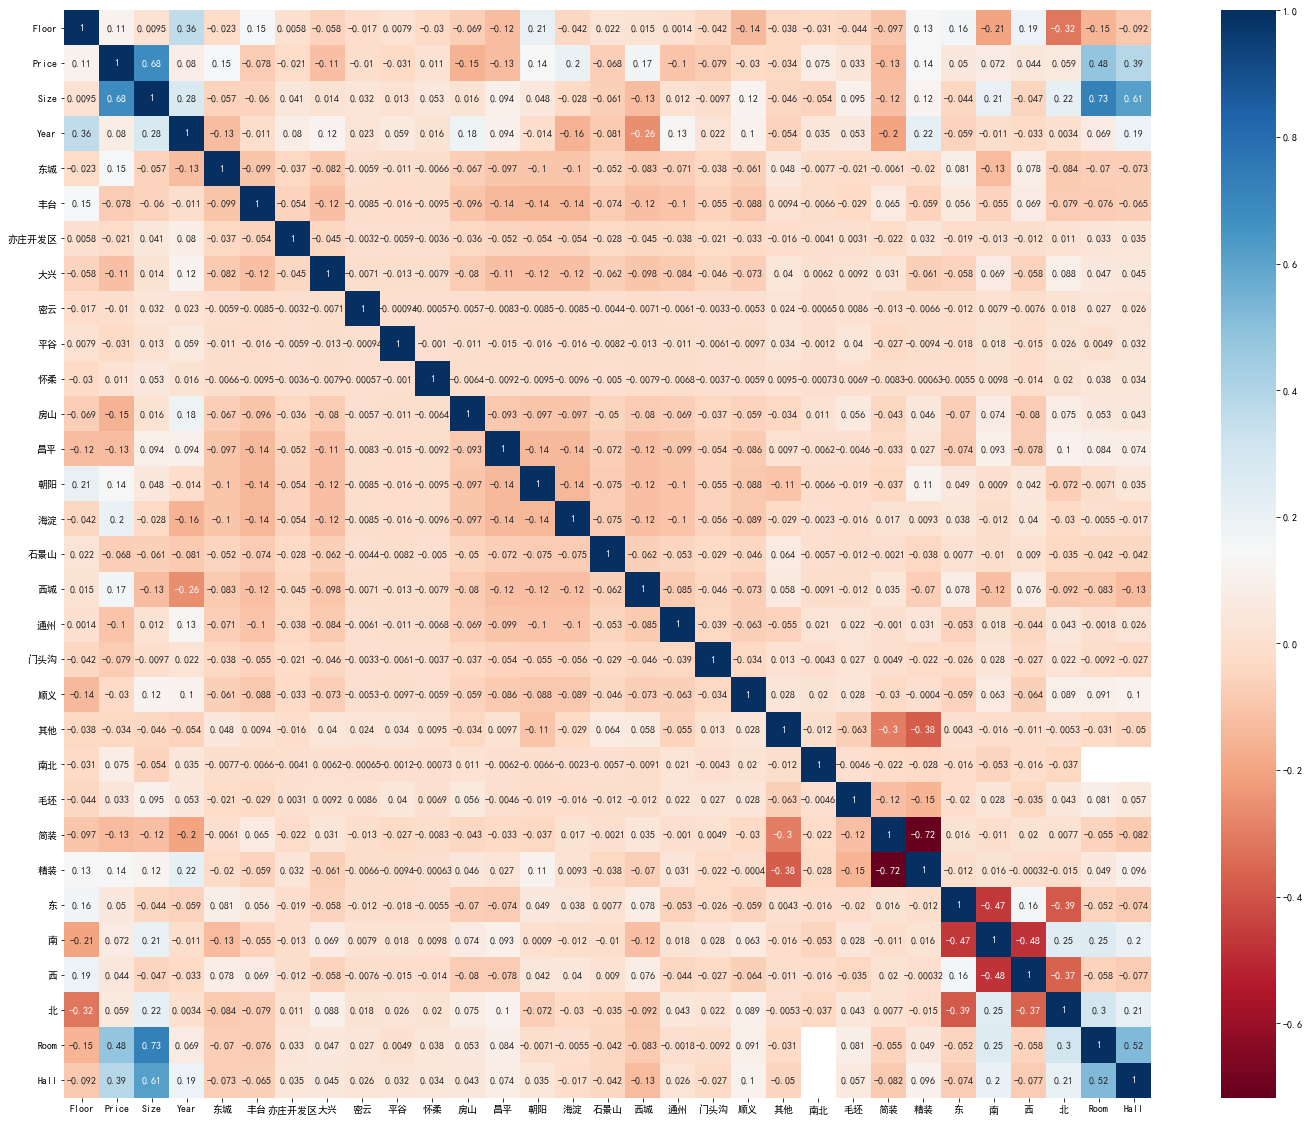

In [218]:
plt.figure(figsize=(25, 20))
sns.heatmap(data_corr, square=True,cmap='RdBu',annot=True)

上图中，颜色越靠近蓝色，表示相关系数越接近于1，颜色越靠近红色，表示越接近与-1。

**初步结论**：

- 可以大致看出价格price和房屋size、Room、Hall**正显著相关性**

- 南北也是用户选择的一个较为重要的指标

## 🚑 **二、数据清洗**

### 0️⃣. 异常值处理

![image.png](./src/error_data.png)

由于存在个别类型错误，如简装和精装，特征值错位，故需要移除

In [219]:
wrong_type = data[(data['Elevator'] != '有电梯') & (data['Elevator'] != '无电梯')& (data['Elevator'] == '')].index.tolist()
data.drop(index=wrong_type,inplace=True)

这里选用上面5个相关性较强的特征来绘制散点图，以**寻找离群点**

`'Size'`,`'Room'`,`'Hall'`,`'北'`,`'南'`

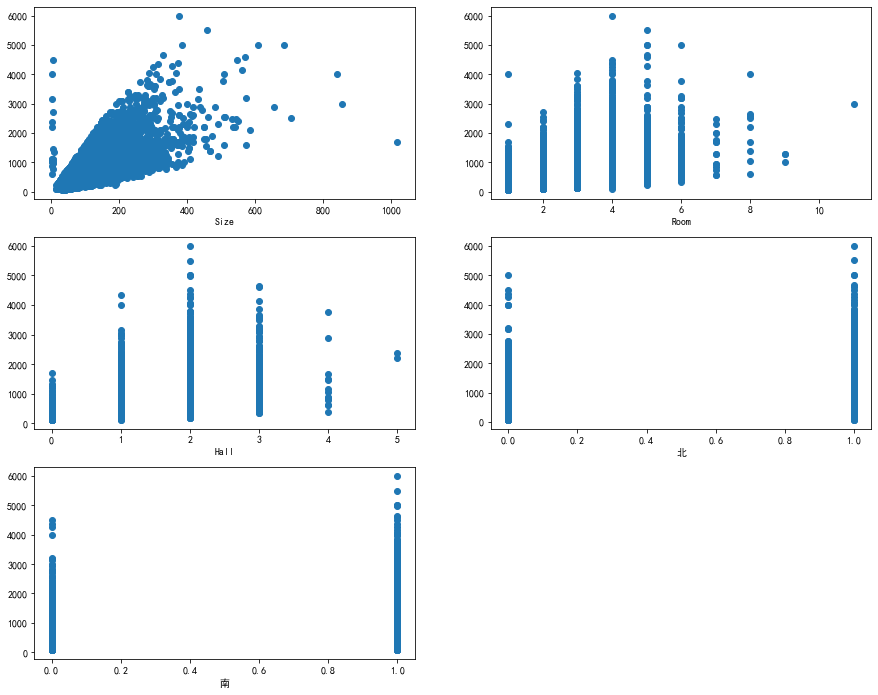

In [220]:
# 选取Size,Room,Hall,北,南这五个特征来查看相关性
fig = plt.figure(figsize=(15,12))
cols = ['Size','Room','Hall','北','南']
for col in cols:
    ax = fig.add_subplot(3, 2, cols.index(col)+1)
    ax.scatter(data[col], data['Price'])
    ax.set_xlabel(col)
plt.show()

In [221]:
# 删除离群点


outlier0 = data[(data['Size']>600) | (data['Price']>5000)].index.tolist()

outlier1_1 = data[(data['Hall']==1) & (data['Price']>3500)].index.tolist()
outlier1_2 = data[(data['Hall']==2) & (data['Price']>4500)].index.tolist()
outlier1_3 = data[(data['Hall']==3) & (data['Price']>4300)].index.tolist()
outlier1_4 = data[(data['Hall']==4) & (data['Price']>2000)].index.tolist()
outlier1_5 = data[(data['Hall']>4)].index.tolist()

outlier2_1 = data[(data['Room']==1) & (data['Price']>2000)].index.tolist()
outlier2_2 = data[(data['Room']==4) & (data['Price']>5000)].index.tolist()
outlier2_3 = data[(data['Room']==6) & (data['Price']>4000)].index.tolist()
outlier2_4 = data[(data['Room']==8) & ((data['Price']>3000)|(data['Price']<2000))].index.tolist()
outlier2_5 = data[(data['Room']>8)].index.tolist()

outlier3_1 = data[(data['北'] == 0) & (data['Price']>3000)&(data['Price']<3500)].index.tolist()
outlier3_2 = data[(data['北'] == 0) & (data['Price']>4800)].index.tolist()
outlier3_3 = data[(data['北'] == 1) & (data['Price']>3500)].index.tolist()

outlier4= data[(data['南'] == 1) & (data['Price']>5000)].index.tolist()

outliers = outlier0 + outlier1_1 + outlier1_2 + outlier1_3 + outlier1_4 + outlier1_5+ outlier2_1 + outlier2_2 + outlier2_3 + outlier2_4 + outlier2_5 + outlier3_1 + outlier3_2 + outlier3_3+outlier4
outliers = list(set(outliers))
print('离群点个数为{}，其索引为{}'.format(len(outliers), outliers))

离群点个数为48，其索引为[2305, 17281, 20228, 15748, 15749, 22278, 8072, 3722, 22164, 22933, 2325, 21786, 284, 14369, 17959, 20265, 7466, 20266, 3245, 8754, 22069, 23482, 20416, 2368, 6217, 20170, 23119, 16210, 16089, 22236, 14557, 20957, 5087, 23008, 7648, 23266, 3178, 22254, 4078, 22383, 2417, 2546, 14322, 3448, 15353, 23418, 2811, 8831]


In [222]:
# 特征矩阵中的离群点删除
data.drop(index=outliers, inplace=True)
# 重置索引
data.reset_index(drop=True, inplace=True)

### 1️⃣. 缺失值处理

为了直观地了解哪些特征含有缺失值，以及缺失值的占比，我们定义一个统计缺失值的函数

In [223]:
# 统计缺失值
def calc_mis_val(df):
    cols = df.columns
    mis_val = df.isnull().sum()
    mis_val_pct = round(100 * mis_val / df.shape[0], 2)
    mis_val_df = pd.DataFrame({'mis_val':mis_val, 'mis_val_pct(%)':mis_val_pct}, index=cols)
    mis_val_df = mis_val_df[mis_val_df['mis_val'] != 0].sort_values('mis_val', ascending=False)
    print('总列数：', df.shape[1])
    print('含缺失值列数：', mis_val_df.shape[0])
    return mis_val_df

all_mis_val = calc_mis_val(data)
all_mis_val

总列数： 34
含缺失值列数： 3


,mis_val,mis_val_pct(%)
Elevator,8215,34.77
Hall,621,2.63
Room,19,0.08


通常情况下，有缺失值表示样本没有这个特征。

In [224]:
data.loc[data['Hall'].isnull(), 'Hall'] = 0
data.loc[data['Room'].isnull(), 'Room'] = 0

对于电梯这个特征而言：

- 通常情况下楼层`Floor`>6：有电梯，否则填充无

In [225]:
def process_missing_elevator(df):
    # 填补Elevator缺失值  
    df.loc[(df['Floor'] > 6) & (df['Elevator'].isnull()), 'Elevator'] = '有电梯'
    df.loc[(df['Floor'] <= 6) & (df['Elevator'].isnull()), 'Elevator'] = '无电梯'
    
    # 处理`Elevator` 有电梯->1 无电梯->0
    df.loc[df['Elevator']=="有电梯","ElevatorNum"] = 1
    df.loc[df['Elevator'] > '1',"ElevatorNum"] = 1
    
    df.loc[df['Elevator']=="无电梯","ElevatorNum"] = 0

process_missing_elevator(data)

data.drop(['Elevator'], axis=1, inplace=True) 

data.to_csv("ElevatorNum.csv")
data.head()    

,District,Floor,Garden,Price,Size,Year,东城,丰台,亦庄开发区,大兴,...,毛坯,简装,精装,东,南,西,北,Room,Hall,ElevatorNum
0,灯市口,6,锡拉胡同21号院,780.0,75.0,1988,1,0,0,0,...,0,0,1,1.0,0.0,1.0,0.0,3.0,1.0,0.0
1,东单,6,东华门大街,705.0,60.0,1988,1,0,0,0,...,0,0,1,0.0,1.0,0.0,1.0,2.0,1.0,0.0
2,崇文门,16,新世界中心,1400.0,210.0,1996,1,0,0,0,...,0,0,0,0.0,1.0,1.0,0.0,3.0,1.0,1.0
3,崇文门,7,兴隆都市馨园,420.0,39.0,2004,1,0,0,0,...,0,0,1,0.0,1.0,0.0,0.0,1.0,1.0,1.0
4,陶然亭,19,中海紫御公馆,998.0,90.0,2010,1,0,0,0,...,0,0,1,0.0,1.0,0.0,0.0,2.0,2.0,1.0


In [226]:
data.isnull().sum()

District       0
Floor          0
Garden         0
Price          0
Size           0
Year           0
东城             0
丰台             0
亦庄开发区          0
大兴             0
密云             0
平谷             0
怀柔             0
房山             0
昌平             0
朝阳             0
海淀             0
石景山            0
西城             0
通州             0
门头沟            0
顺义             0
其他             0
南北             0
毛坯             0
简装             0
精装             0
东              0
南              0
西              0
北              0
Room           0
Hall           0
ElevatorNum    0
dtype: int64

## 🏆 **三、数据分析**

### 💎主要目的：

- 标签（房价）的分布是怎样的？若不符合正态分布，需要通过数学变换来改善。

- 重要特征与房价的相关性？相关系数是多少，能否创建新的特征？

- 特征与特征之间的相关性？是否有一些特征，它们之间息息相关，从而产生多重共线性？这些特征要如何处理？

#### 1️⃣. 房价分布

D:\developer_tools\Anaconda\envs\d2l\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

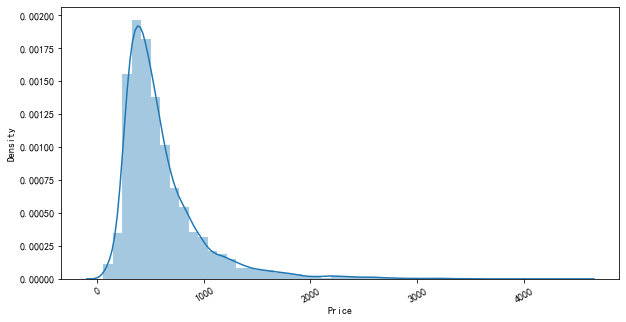

In [227]:
plt.figure(figsize=(10,5))
sns.distplot(data['Price'])
plt.xticks(rotation=30)

由图可得，房价偏离正态分布，并且有明显的正偏度，后续需要通过对数变换处理。

#### 2️⃣. 重要特征相关性

<AxesSubplot:>

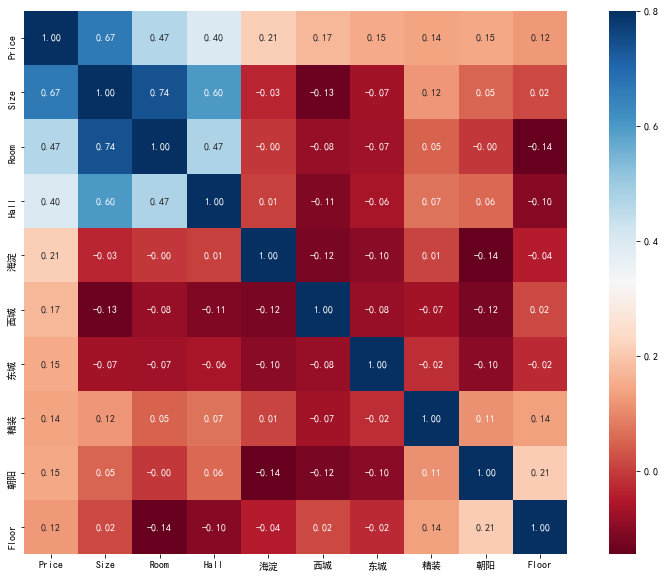

In [228]:
# 选择相关系数较大的特征绘图
plt.figure(figsize=(15, 10))
top_cols = data_corr['Price'].nlargest(10).index
data_corr_top = data.loc[:, top_cols].corr()
sns.heatmap(data_corr_top, annot=True, square=True, fmt='.2f', cmap='RdBu', vmax=0.8)

可以看出，人们关心的是：

- 房子的总体面积

- 房屋的布局，有几室几厅

- 相对而言，人们更喜欢海淀、西城、东城、朝阳的房子

- 相对而言，精装的房子更受喜欢

此外，可以发现，部分特征之间存在很强的相关性，比如Room，Hall和Size，房屋的房间越多，那么房屋的面积肯定也会越大！

**由此，我们了解到这个数据集可能存在多重共线性，因此尽量避免使用线性回归模型。**

为了节约时间和空间，我们利用seaborn中的pairplot来绘制网格图。对角线表示特征的直方分布图，非对角线表示的是不同特征之间的散点图。

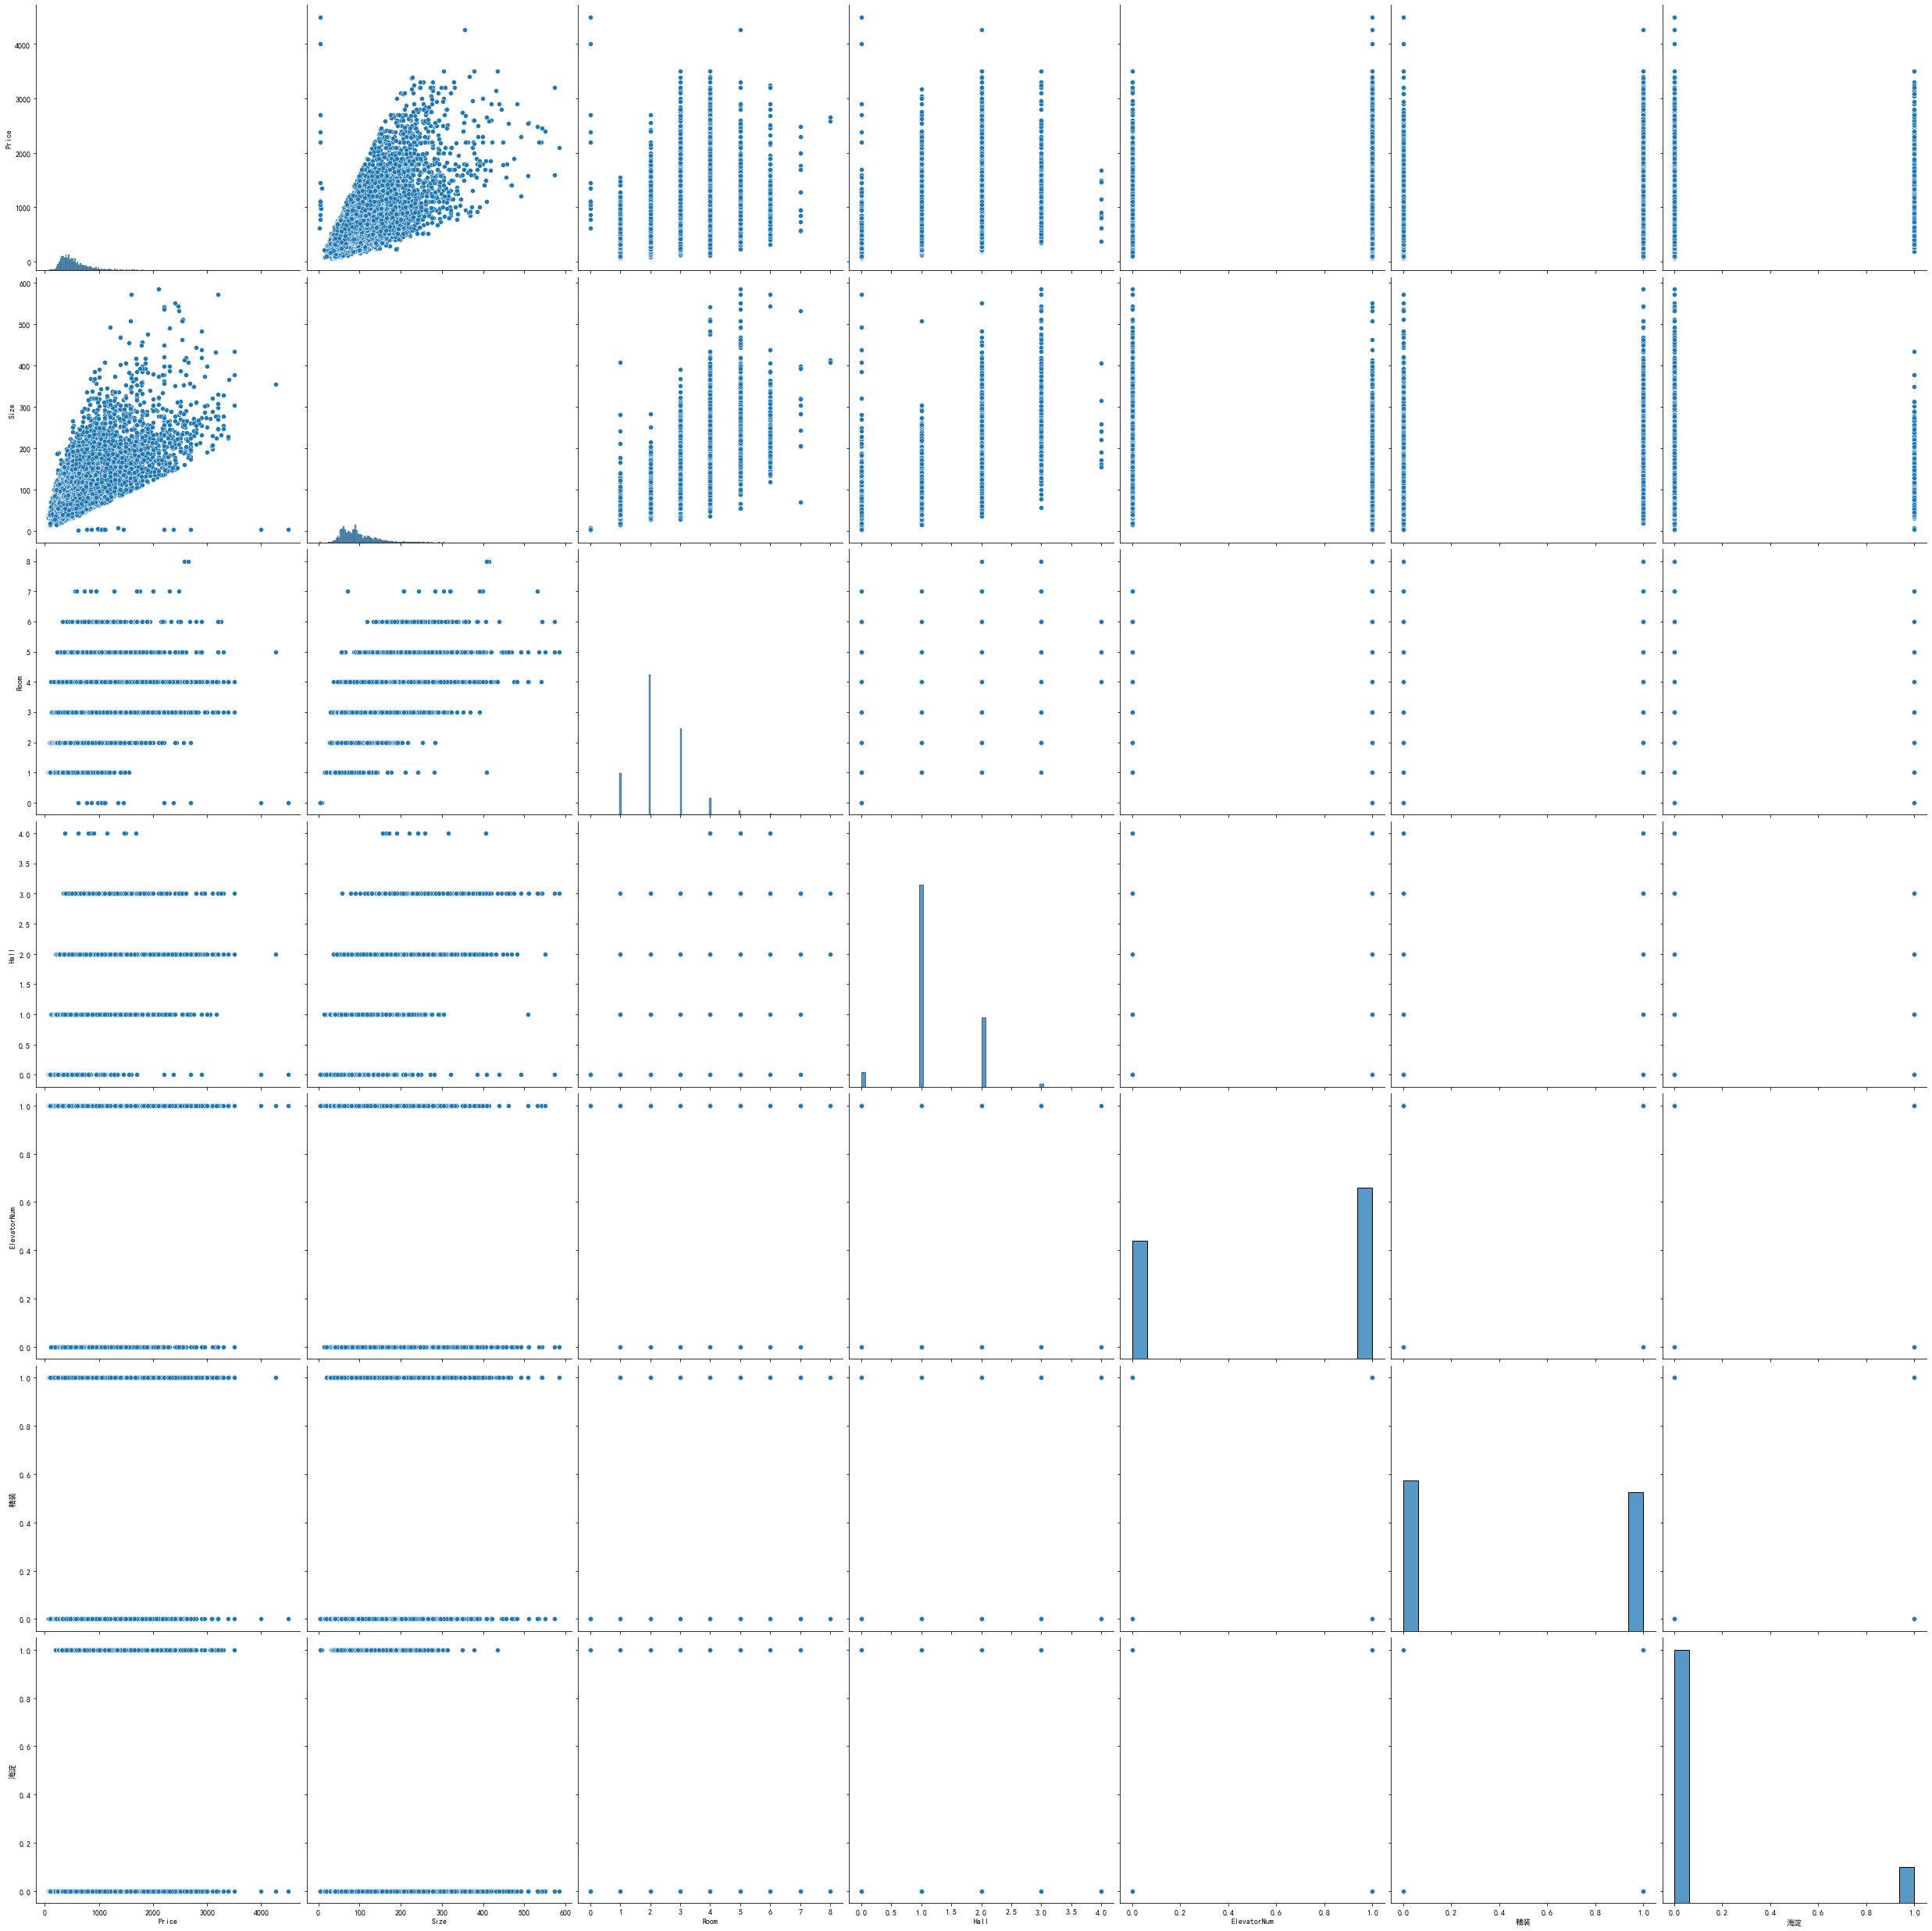

In [229]:
# 绘制网格图，查看相关性
cols = ['Price','Size','Room','Hall','ElevatorNum','精装','海淀']
sns.pairplot(data[cols], height=5)

## 🥕 **四、特征工程**

### 1️⃣. 修改数据类型

**一些数值型特征实际属于类别变量，修改其数据类型为文本型**

In [230]:
features = ["东","南","西","北"]
for i in features:
    data[i] = data[i].astype(object)

### 2️⃣. 创造特征

基于业务理解，通过特征之间的组合，我们创建一些新的特征

由于数据集的原因，我们无法找到更多的特征，数据结果不理想

(这里只是利用`单价`说明这个**创造特征**想法)

In [231]:
# 创造特征
# data['PerPrice'] = data['Price'] / data['Size']

### 3️⃣. 数值型特征对数变换

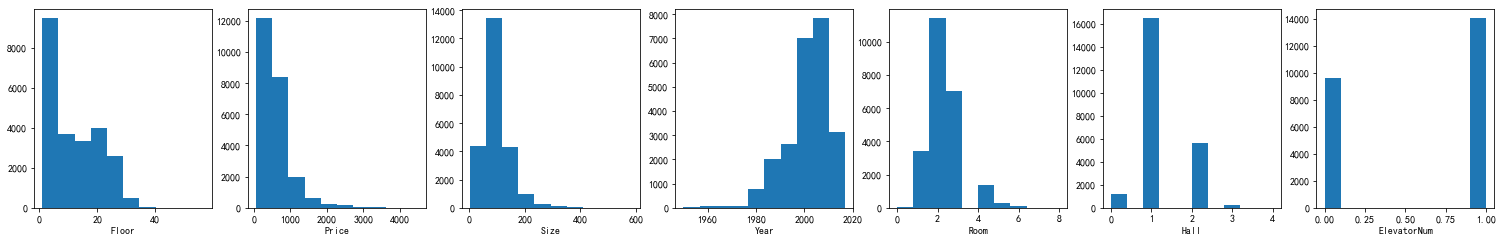

In [232]:
# 数值型特征的数据变换：改变数据分布
numeric_df = data.select_dtypes(['float64','int32','int64'])
numeric_cols = numeric_df.columns.tolist()

fig = plt.figure(figsize=(30, 30))
for col in numeric_cols:
    ax = fig.add_subplot(7, 8, numeric_cols.index(col)+1)
    ax.set_xlabel(col)
    ax.hist(numeric_df[col])

In [233]:
# 计算各数值型特征的偏度
skewed_cols = data[numeric_cols].apply(lambda x: skew(x)).sort_values(ascending=False)

skewed_df = pd.DataFrame({'skew':skewed_cols})
skewed_df

,skew
Price,2.513914
Size,2.319807
Room,0.791649
Floor,0.683266
Hall,0.567105
ElevatorNum,-0.378607
Year,-1.184825


In [234]:
# 对偏度绝对值大于2的特征进行对数变换
data['Size'] = np.log1p(data['Size'])

D:\developer_tools\Anaconda\envs\d2l\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


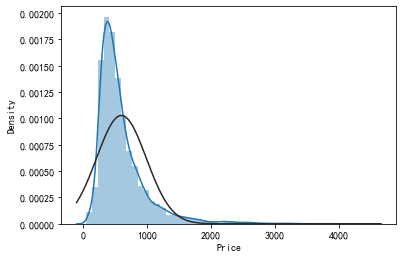

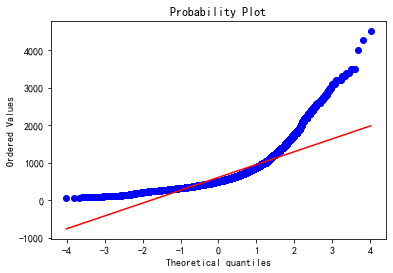

In [235]:
# Price属于偏态分布
sns.distplot(data["Price"], fit=norm)
fig = plt.figure()
res = stats.probplot(data["Price"], plot=plt)

D:\developer_tools\Anaconda\envs\d2l\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


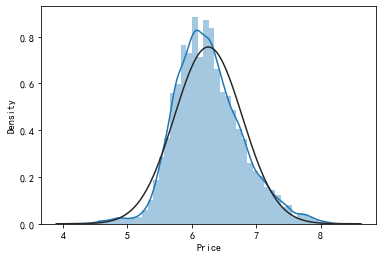

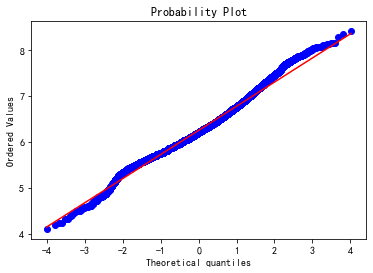

In [236]:
# 对其进行对数变换
data["Price"] = np.log1p(data["Price"])
data.to_csv("log_price.csv")

# 绘制分布图
sns.distplot(data["Price"], fit=norm)
fig = plt.figure()
res = stats.probplot(data["Price"], plot=plt)

**结论**：经过对数变换后，房价与正态分布较为接近。

In [237]:
# ppt中跳过
features = ["东","南","西","北"]
for i in features:
    data[i] = data[i].astype(int)

### 4️⃣. one hot编码

In [238]:
# 对剩余字文本型特征进行one hot编码
data.drop('Garden', axis=1, inplace=True) 

data = pd.get_dummies(data)
data.to_csv("one_hot_all.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23629 entries, 0 to 23628
Columns: 264 entries, Floor to District_鼓楼大街
dtypes: float64(5), int32(4), int64(2), uint8(253)
memory usage: 7.3 MB


可以看到，剩余的文本型特征都被独热编码了，整个特征矩阵的数据类型都是数值。

特征工程到此告一段落

## 👟 **五、建模!**

### 1️⃣. 导入相关包

In [239]:
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

### 2️⃣. 建模

建模之前，先划分数据集

- 按照训练集：验证集 = 7:3的方式划分

- 定义交叉验证模式，

In [240]:
Y = data["Price"]
data.drop('Price', axis=1, inplace=True)
X = data.copy()

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3, random_state=10)

# 定义交叉验证模式
kf = KFold(n_splits=10, random_state=50, shuffle=True)

**衡量指标：**

公式

In [243]:
# 定义衡量指标函数
# def rmse(y, y_pred):
#     rmse = np.sqrt(mean_squared_error(y, y_pred))
#     return rmse

def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, Y, scoring='neg_mean_squared_error', cv=kf,n_jobs=-1))
    return rmse

def r2_score(model):
    model.fit(Xtrain, Ytrain)
    score = model.score(Xtest, Ytest)
    return score

**建立模型：**

模型介绍：XXXX

In [244]:
# 建立基线模型
lgb = LGBMRegressor(objective='regression', random_state=50)
xgb = XGBRegressor(objective='reg:squarederror', random_state=50)
ridge = make_pipeline(RobustScaler(), RidgeCV(cv=kf))
svr = make_pipeline(RobustScaler(), SVR())
gbr = GradientBoostingRegressor(random_state=50)
rfc = RandomForestRegressor(random_state=50)

**评估指标：** $R^2$score

In [245]:
# 基线模型评估
models = [lgb, xgb, ridge, svr, gbr, rfc]
model_names = ['lgb','xgb','ridge','svr','gbr','rfc']
scores = {}

for i, model in enumerate(models):
    score = r2_score(model)
    print("{} r2_score: {:.4f}".format(model_names[i],score))
    scores[model_names[i]] = score

r2_df = pd.DataFrame(scores, index=['r2_score'])
r2_df.sort_values('r2_score', axis=1, inplace=True)
r2_df.to_csv("r2_score.csv")
r2_df

lgb r2_score: 0.9243
xgb r2_score: 0.9332
ridge r2_score: 0.9101
svr r2_score: 0.9456
gbr r2_score: 0.8674
rfc r2_score: 0.9398


,gbr,ridge,lgb,xgb,rfc,svr
r2_score,0.867363,0.910105,0.924315,0.933233,0.939798,0.945639


**评估指标：**均方误差

In [ ]:
# for i, model in enumerate(models):
#     score = cv_rmse(model)
#     print('{} rmse score: {:.4f}, rmse std: {:.4f}'.format(model_names[i], score.mean(), score.std()))
#     scores[model_names[i]] = (score.mean(), score.std())
    
# rmse_df = pd.DataFrame(scores, index=['rmse_score','rmse_std'])

# rmse_df.sort_values('rmse_score', axis=1, inplace=True)
# rmse_df